# Softmax exercise

*Complete and hand in this completed worksheet (including its outputs and any supporting code outside of the worksheet) with your assignment submission. For more details see the [assignments page](http://vision.stanford.edu/teaching/cs231n/assignments.html) on the course website.*

This exercise is analogous to the SVM exercise. You will:

- implement a fully-vectorized **loss function** for the Softmax classifier
- implement the fully-vectorized expression for its **analytic gradient**
- **check your implementation** with numerical gradient
- use a validation set to **tune the learning rate and regularization** strength
- **optimize** the loss function with **SGD**
- **visualize** the final learned weights


In [4]:
a = 0
if a == 0:
    b = 2
print(b)

2


In [1]:
import random
import numpy as np
from cs231n.data_utils import load_CIFAR10
import matplotlib.pyplot as plt

%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

# for auto-reloading extenrnal modules
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

In [2]:
def get_CIFAR10_data(num_training=49000, num_validation=1000, num_test=1000, num_dev=500):
    """
    Load the CIFAR-10 dataset from disk and perform preprocessing to prepare
    it for the linear classifier. These are the same steps as we used for the
    SVM, but condensed to a single function.  
    """
    # Load the raw CIFAR-10 data
    cifar10_dir = 'cs231n/datasets/cifar-10-batches-py'
    
    # Cleaning up variables to prevent loading data multiple times (which may cause memory issue)
    try:
       del X_train, y_train
       del X_test, y_test
       print('Clear previously loaded data.')
    except:
       pass

    X_train, y_train, X_test, y_test = load_CIFAR10(cifar10_dir)
    
    # subsample the data
    mask = list(range(num_training, num_training + num_validation))
    X_val = X_train[mask]
    y_val = y_train[mask]
    mask = list(range(num_training))
    X_train = X_train[mask]
    y_train = y_train[mask]
    mask = list(range(num_test))
    X_test = X_test[mask]
    y_test = y_test[mask]
    mask = np.random.choice(num_training, num_dev, replace=False)
    X_dev = X_train[mask]
    y_dev = y_train[mask]
    
    # Preprocessing: reshape the image data into rows
    X_train = np.reshape(X_train, (X_train.shape[0], -1))
    X_val = np.reshape(X_val, (X_val.shape[0], -1))
    X_test = np.reshape(X_test, (X_test.shape[0], -1))
    X_dev = np.reshape(X_dev, (X_dev.shape[0], -1))
    
    # Normalize the data: subtract the mean image
    mean_image = np.mean(X_train, axis = 0)
    X_train -= mean_image
    X_val -= mean_image
    X_test -= mean_image
    X_dev -= mean_image
    
    # add bias dimension and transform into columns
    X_train = np.hstack([X_train, np.ones((X_train.shape[0], 1))])
    X_val = np.hstack([X_val, np.ones((X_val.shape[0], 1))])
    X_test = np.hstack([X_test, np.ones((X_test.shape[0], 1))])
    X_dev = np.hstack([X_dev, np.ones((X_dev.shape[0], 1))])
    
    return X_train, y_train, X_val, y_val, X_test, y_test, X_dev, y_dev


# Invoke the above function to get our data.
X_train, y_train, X_val, y_val, X_test, y_test, X_dev, y_dev = get_CIFAR10_data()
print('Train data shape: ', X_train.shape)
print('Train labels shape: ', y_train.shape)
print('Validation data shape: ', X_val.shape)
print('Validation labels shape: ', y_val.shape)
print('Test data shape: ', X_test.shape)
print('Test labels shape: ', y_test.shape)
print('dev data shape: ', X_dev.shape)
print('dev labels shape: ', y_dev.shape)

Train data shape:  (49000, 3073)
Train labels shape:  (49000,)
Validation data shape:  (1000, 3073)
Validation labels shape:  (1000,)
Test data shape:  (1000, 3073)
Test labels shape:  (1000,)
dev data shape:  (500, 3073)
dev labels shape:  (500,)


## Softmax Classifier

Your code for this section will all be written inside **cs231n/classifiers/softmax.py**. 


In [7]:
# First implement the naive softmax loss function with nested loops.
# Open the file cs231n/classifiers/softmax.py and implement the
# softmax_loss_naive function.

from cs231n.classifiers.softmax import softmax_loss_naive
import time

# Generate a random softmax weight matrix and use it to compute the loss.
W = np.random.randn(3073, 10) * 0.0001
loss, grad = softmax_loss_naive(W, X_dev, y_dev, 0.0)

# As a rough sanity check, our loss should be something close to -log(0.1).
print('loss: %f' % loss)
print('sanity check: %f' % (-np.log(0.1)))

loss: 2.344366
sanity check: 2.302585


In [14]:
l = np.array([[1,2,3],[4,5,6],[7,8,9]])
ll = np.array([1,2,3])

print(ll*2)

[2 4 6]


**Inline Question 1**

Why do we expect our loss to be close to -log(0.1)? Explain briefly.**

$\color{blue}{\textit Your Answer:}$ *Fill this in* 



In [1]:
#W和X初始化的比较小，答案可能接近一个定值，权值矩阵随机初始化，答案的概率可能相同，由于是10分类，为0.1

In [8]:
# Complete the implementation of softmax_loss_naive and implement a (naive)
# version of the gradient that uses nested loops.
loss, grad = softmax_loss_naive(W, X_dev, y_dev, 0.0)

# As we did for the SVM, use numeric gradient checking as a debugging tool.
# The numeric gradient should be close to the analytic gradient.
from cs231n.gradient_check import grad_check_sparse
f = lambda w: softmax_loss_naive(w, X_dev, y_dev, 0.0)[0]
grad_numerical = grad_check_sparse(f, W, grad, 10)

# similar to SVM case, do another gradient check with regularization
loss, grad = softmax_loss_naive(W, X_dev, y_dev, 5e1)
f = lambda w: softmax_loss_naive(w, X_dev, y_dev, 5e1)[0]
grad_numerical = grad_check_sparse(f, W, grad, 10)

numerical: 1.917482 analytic: 1.917482, relative error: 3.627749e-08
numerical: 2.351247 analytic: 2.351247, relative error: 2.773722e-08
numerical: -0.043784 analytic: -0.043784, relative error: 1.093698e-07
numerical: -0.053918 analytic: -0.053918, relative error: 2.068983e-07
numerical: -1.089018 analytic: -1.089018, relative error: 1.743875e-08
numerical: -5.577170 analytic: -5.577170, relative error: 3.481961e-09
numerical: -2.447140 analytic: -2.447140, relative error: 9.754412e-09
numerical: 1.580767 analytic: 1.580767, relative error: 1.281910e-08
numerical: -1.539440 analytic: -1.539440, relative error: 1.313895e-08
numerical: -2.441078 analytic: -2.441078, relative error: 1.259579e-09
numerical: -1.186802 analytic: -1.186802, relative error: 1.645105e-08
numerical: -0.472350 analytic: -0.472350, relative error: 3.543147e-08
numerical: -4.842806 analytic: -4.842806, relative error: 6.076423e-09
numerical: 0.101494 analytic: 0.101494, relative error: 4.996543e-07
numerical: -3.

In [15]:
# Now that we have a naive implementation of the softmax loss function and its gradient,
# implement a vectorized version in softmax_loss_vectorized.
# The two versions should compute the same results, but the vectorized version should be
# much faster.
tic = time.time()
loss_naive, grad_naive = softmax_loss_naive(W, X_dev, y_dev, 0.000005)
toc = time.time()
print('naive loss: %e computed in %fs' % (loss_naive, toc - tic))

from cs231n.classifiers.softmax import softmax_loss_vectorized
tic = time.time()
loss_vectorized, grad_vectorized = softmax_loss_vectorized(W, X_dev, y_dev, 0.000005)
toc = time.time()
print('vectorized loss: %e computed in %fs' % (loss_vectorized, toc - tic))

# As we did for the SVM, we use the Frobenius norm to compare the two versions
# of the gradient.
grad_difference = np.linalg.norm(grad_naive - grad_vectorized, ord='fro')
print('Loss difference: %f' % np.abs(loss_naive - loss_vectorized))
print('Gradient difference: %f' % grad_difference)

naive loss: 2.344366e+00 computed in 0.144654s
vectorized loss: 2.344366e+00 computed in 0.004652s
Loss difference: 0.000000
Gradient difference: 0.000000


In [27]:
yx = np.array([0,1,2,3,4])
yz = np.zeros((5,9))
yz[:,yx]=1
print(yz)

[[1. 1. 1. 1. 1. 0. 0. 0. 0.]
 [1. 1. 1. 1. 1. 0. 0. 0. 0.]
 [1. 1. 1. 1. 1. 0. 0. 0. 0.]
 [1. 1. 1. 1. 1. 0. 0. 0. 0.]
 [1. 1. 1. 1. 1. 0. 0. 0. 0.]]


In [121]:
import numpy as np
ll = np.asarray([1,[2],3])
aa = ll[1]
bb = np.asarray([2])
aa+=bb
print(ll,aa)

[1 list([2]) 3] [4]


In [133]:
oo = ["112",111]
oo1 = oo[0:2]
oo1[1]+=1
print(oo,oo1)

['112', 111] ['112', 112]


In [135]:
Anndy = ['Anndy', ['age', 24]]
Tom = Anndy[:]
Cindy = list(Anndy)
Tom[1][0] = "12"
print(Anndy, Tom, Cindy)

['Anndy', ['12', 24]] ['Anndy', ['12', 24]] ['Anndy', ['12', 24]]


In [139]:
oo2 = [(1,3),[(2,4),22]]
oo3 = oo2[:]
oo3[0] = 1
oo3[1][0]=2
oo3[1][1]=3
print(oo2,oo3)

[(1, 3), [2, 3]] [1, [2, 3]]


In [142]:
xx = [1,[2,4],3]
print(type(xx),id(xx))
cc = xx[1]
print(type(cc))
#print(type(cc),type(cc[1]),id(cc))
#print(type(cc),type(cc[1]),id(cc))
print(type(xx))
cc[0] += 3
print(xx,cc)

<class 'list'> 4758807888
<class 'list'>
<class 'list'>
[1, [5, 4], 3] [5, 4]


In [105]:
aaaa = 2
bbbb = aaaa
bbbb += 2
print(aaaa,bbbb)

2 4


In [48]:
zz = 3
zz2 = zz
zz2 += 1
print(zz,zz2)

3 4


In [164]:
xx1 = np.array([[1,2,3],[4,5,6],[7,8,9]])
xx2 = np.array([2,2,2])
xx3 = xx1/xx2
print(xx3)

[[0.5 1.  1.5]
 [2.  2.5 3. ]
 [3.5 4.  4.5]]


In [39]:
# Use the validation set to tune hyperparameters (regularization strength and
# learning rate). You should experiment with different ranges for the learning
# rates and regularization strengths; if you are careful you should be able to
# get a classification accuracy of over 0.35 on the validation set.
from cs231n.classifiers import Softmax
results = {}
best_val = -1
best_softmax = None
learning_rates = [4.8e-7, 5.8e-7]
regularization_strengths = [2.5e4, 2.8e4]

################################################################################
# TODO:                                                                        #
# Use the validation set to set the learning rate and regularization strength. #
# This should be identical to the validation that you did for the SVM; save    #
# the best trained softmax classifer in best_softmax.                          #
################################################################################
# *****START OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****

for i in learning_rates:
    for j in regularization_strengths:
        soft_max = Softmax()
        soft_max.train(X_train,y_train,learning_rate=i,reg=j,num_iters=1500,batch_size=200,verbose=True)
        
        pre_train = soft_max.predict(X_train)
        pre_val = soft_max.predict(X_val)
        
        acc_train = np.mean(pre_train==y_train)
        acc_val = np.mean(pre_val==y_val)
        
        if acc_val > best_val:
            best_val = acc_val
            best_softmax = soft_max

pass

# *****END OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****
    
# Print out results.
for lr, reg in sorted(results):
    train_accuracy, val_accuracy = results[(lr, reg)]
    print('lr %e reg %e train accuracy: %f val accuracy: %f' % (
                lr, reg, train_accuracy, val_accuracy))
    
print('best validation accuracy achieved during cross-validation: %f' % best_val)




best validation accuracy achieved during cross-validation: 0.343000


In [40]:
# evaluate on test set
# Evaluate the best softmax on test set
y_test_pred = best_softmax.predict(X_test)
test_accuracy = np.mean(y_test == y_test_pred)
print('softmax on raw pixels final test set accuracy: %f' % (test_accuracy, ))


softmax on raw pixels final test set accuracy: 0.329000


**Inline Question 2** - *True or False*

Suppose the overall training loss is defined as the sum of the per-datapoint loss over all training examples. It is possible to add a new datapoint to a training set that would leave the SVM loss unchanged, but this is not the case with the Softmax classifier loss.

$\color{blue}{\textit Your Answer:}$


$\color{blue}{\textit Your Explanation:}$



In [ ]:
#svm可以loss加0，而softmax一定要加一个非0的概率

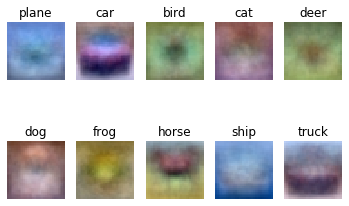

In [41]:
# Visualize the learned weights for each class
w = best_softmax.W[:-1,:] # strip out the bias
w = w.reshape(32, 32, 3, 10)

w_min, w_max = np.min(w), np.max(w)

classes = ['plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
for i in range(10):
    plt.subplot(2, 5, i + 1)
    
    # Rescale the weights to be between 0 and 255
    wimg = 255.0 * (w[:, :, :, i].squeeze() - w_min) / (w_max - w_min)
    plt.imshow(wimg.astype('uint8'))
    plt.axis('off')
    plt.title(classes[i])
    

In [7]:
j = "acb"
b = tuple(sorted(j))
dd = {}
dd[b] = [666]
print(dd.values())

dict_values([[666]])
